In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

from gensim.models import Word2Vec
from scipy import spatial

from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import RegexpTokenizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Hate_speech/train_tweets.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
#check for null values
df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
#removing stopwords 
'''import pandas as pd
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop = set(stopwords.words('english'))

def rem_stopwords(input_text):
    words=input_text.lower().split()
    return ' '.join([word for word in words if word not in stop])

df['clean_text'] = df['tweet'].apply(lambda s: rem_stopwords(s))
df
'''

"import pandas as pd\nfrom nltk.corpus import stopwords\nimport nltk\n\nnltk.download('stopwords')\nstop = set(stopwords.words('english'))\n\ndef rem_stopwords(input_text):\n    words=input_text.lower().split()\n    return ' '.join([word for word in words if word not in stop])\n\ndf['clean_text'] = df['tweet'].apply(lambda s: rem_stopwords(s))\ndf\n"

In [ ]:
#removing links
'''def process_tweet(tweet):
  return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ", tweet.lower()).split())

df['clean_text'] = df['tweet'].apply(process_tweet)
'''

'def process_tweet(tweet):\n  return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ", tweet.lower()).split())\n\ndf[\'clean_text\'] = df[\'tweet\'].apply(process_tweet)\n'

In [ ]:
'''import nltk
from nltk import word_tokenize
nltk.download('punkt')

df['clean_text'] = df['clean_text'].apply(word_tokenize)
'''


"import nltk\nfrom nltk import word_tokenize\nnltk.download('punkt')\n\ndf['clean_text'] = df['clean_text'].apply(word_tokenize)\n"

In [ ]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer


stopwords = nltk.corpus.stopwords.words("english")

import string 

def clean_txt(tweet):
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    Tweet = re.sub(regex_pat," ",tweet)
    
    #Remove @tags
    Tweet= re.sub(r'@[\w\-]+',"",Tweet)
    
    # removal of links[https://abc.com]
    url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    Tweet = re.sub(url_regex,"",Tweet)
    
    # split into words (tokenizing)
    Tweet = nltk.word_tokenize(Tweet)
    
    # convert to lower case
    Tweet = [w.lower() for w in Tweet]    
    
    # remove punctuation from each word
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    Tweet = [re_punc.sub('', w) for w in Tweet]

    # remove remaining tokens that are not alphabetic
    Tweet = [word for word in Tweet if word.isalpha()]

    # filter out stop words
    Tweet = [w for w in Tweet if w not in  stopwords] 
    
    # filter out short tokens
    Tweet = [word for word in Tweet if len(word) > 2]

    #Stemm all the words in the sentence
    lemmatizer = WordNetLemmatizer() 
    lem_words = [lemmatizer.lemmatize(word) for word in Tweet]
    combined_text = ' '.join(lem_words)
    return combined_text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Cleaning the text data
df['clean_text'] = df['tweet'].apply(clean_txt)
df.sample(10)

,id,label,tweet,clean_text
10620,10621,0,helen&amp;matt have just got married! #aftersp...,helen amp matt got married afterspringingreenl...
28563,28564,0,"@user smile, even when the world wants you no...",smile even world want smile lovemylife gay gay...
18292,18293,0,1st order is almost here! . keep an eye on ou...,order almost keep eye facebook special offer t...
20049,20050,0,let the sunshine... ð§âï¸ #sunlight #sun ...,let sunshine sunlight sun goodmood grillon zen
15649,15650,0,time to go out!,time
21453,21454,0,hate wishing my life away but oooh i am so blo...,hate wishing life away oooh bloody excited nex...
5744,5745,0,#crazy #confused #happy ..... anyway it's me,crazy confused happy anyway
18779,18780,0,"lights are up, power in. time for some testing...",light power time testing business end build pr...
23470,23471,0,@user still delays and cancellations going on ...,still delay cancellation going week need soing
21227,21228,0,we are bad at selfies. #selfie #sillyfaces ...,bad selfies selfie sillyfaces cool datenight l...


In [ ]:
df.drop(columns = ['tweet', 'id'], inplace=True)

In [ ]:
df

,label,clean_text
0,0,father dysfunctional selfish drag kid dysfunct...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love take time
4,0,factsguide society motivation
...,...,...
31957,0,ate isz youuu
31958,0,see nina turner airwave trying wrap mantle gen...
31959,0,listening sad song monday morning otw work sad
31960,1,sikh temple vandalised calgary wso condemns act


In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

X_wb = df['clean_text'].values
Y_wb =df['label'].values

X_wb_train, X_wb_test, Y_wb_train, Y_wb_test = train_test_split(X_wb, Y_wb, stratify=Y_wb,test_size = 0.1, random_state = 1, shuffle=True)



def oversample(train_sample):
  """Oversample minoriity class because of the imbalance"""
  # Separate majority and minority classes in training data for oversampling
  train_majority = train_sample[train_sample['label'] == 0]
  train_minority = train_sample[train_sample['label'] == 1]

  print("majority class before oversample: ", train_majority.shape)
  print("minority class before oversample: ", train_minority.shape)

  # Upsample minority class
  train_minority_oversampled = resample(train_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples= train_majority.shape[0],  # to match majority class
                                 random_state=123)  # reproducible results
 
  # Combine majority class with oversampled minority class
  train_oversampled = pd.concat([train_majority, train_minority_oversampled])
  # shuffling the data
  train_oversampled = train_oversampled.sample(frac=1).reset_index(drop=True)
  # Display new class counts
  print()
  print("After oversampling\n", train_oversampled.label.value_counts(), sep = "")
  return train_oversampled


train_over = oversample(pd.DataFrame({"tweet": X_wb_train, "label": Y_wb_train}))
Y_wb_train = train_over["label"].to_numpy()
X_wb_train = train_over["tweet"]
train_over

majority class before oversample:  (26747, 2)
minority class before oversample:  (2018, 2)

After oversampling
0    26747
1    26747
Name: label, dtype: int64


,tweet,label
0,trueobama answer fight radical islam instead s...,0
1,unappetizing scam woman need throw shackle sal...,1
2,pretty sad group people get killed people feel...,0
3,feminismiscancer feminismisterrorism feminismm...,1
4,see tomorrow,0
...,...,...
53489,quietly humming win way next meeting may dropp...,0
53490,bihday man staed floor bihed idea,0
53491,preparing anniversary casablanca family love mood,0
53492,allahsoil vps got multimillion dollar bonus av...,1


In [ ]:
from keras.preprocessing.text import Tokenizer
docs = df.clean_text

In [ ]:
t = Tokenizer()
t.fit_on_texts(docs)


In [ ]:
vocab_size = len(t.word_index) + 1

In [ ]:
 word_index = t.word_index

In [ ]:
encoded_docs = t.texts_to_sequences(docs)

In [ ]:
encoded_docs[1:10]

[[91, 4677, 2030, 312, 470, 973, 6571, 3630, 6572, 12957, 8402],
 [17, 2812],
 [70, 1, 23, 5],
 [2419, 1107, 198],
 [839, 215, 4678, 170, 556, 260, 3299, 100, 12958, 9, 12959],
 [1838, 53],
 [77, 145, 39, 39, 55, 145, 974, 125, 1142, 3300, 12960, 26],
 [1, 1086, 8403, 950, 2147, 1223, 12961],
 [567]]

In [ ]:
from keras_preprocessing.sequence import pad_sequences
max_length = 100
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[   13 12956  2267 ...     0     0     0]
 [   91  4677  2030 ...     0     0     0]
 [   17  2812     0 ...     0     0     0]
 ...
 [  872    59   234 ...     0     0     0]
 [ 1297   996  1329 ...     0     0     0]
 [   90    99     0 ...     0     0     0]]


In [ ]:
#word embedding - Glove

from numpy import array
from numpy import asarray
embeddings_index = dict()
f = open('/content/drive/My Drive/glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [ ]:
# create a weight matrix for words in training docs
from numpy import zeros

embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
# define model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=100, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          3384800   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 3,394,801
Trainable params: 10,001
Non-trainable params: 3,384,800
_________________________________________________________________
None


In [ ]:
x = padded_docs
y = array(df['label'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.20, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25569, 100)
(25569,)
(6393, 100)
(6393,)


In [ ]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(25569, 1)
(6393, 1)


In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

#type(padded_docs)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# fit the model
model.fit(x_train, y_train, epochs=50, batch_size = 16, verbose=0)
# evaluate the model
#model.evaluate(padded_docs, y, verbose=0)
#print('Accuracy: %f' % (accuracy*100))

In [ ]:
model.evaluate(x_test, y_test)

200/200 [==============================] - 1s 2ms/step - loss: 0.2015 - accuracy: 0.9370


[0.20145605504512787, 0.9369623064994812]

In [ ]:
y_predicted = model.predict(x_test)
y_predicted = y_predicted.flatten()

200/200 [==============================] - 0s 2ms/step


In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, ..., 0, 0, 1])

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5937
           1       0.59      0.39      0.47       456

    accuracy                           0.94      6393
   macro avg       0.77      0.68      0.72      6393
weighted avg       0.93      0.94      0.93      6393



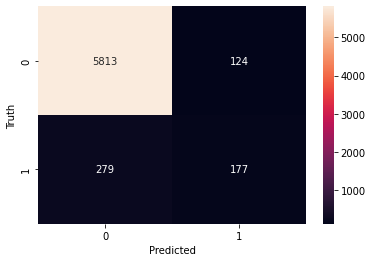

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(classification_report(y_test, y_predicted))


In [ ]:
#LSTM Model

from keras.layers import Dense, Embedding, LSTM, Bidirectional
from keras.models import Sequential
from keras.layers import Flatten

embedding_layer = Embedding(vocab_size, max_length, weights=[embedding_matrix], input_length=max_length, trainable=False)

embedding_dim =16
input_length = 100
model_lstm = Sequential([embedding_layer, 
                         Bidirectional(LSTM(embedding_dim, return_sequences=True)), 
                         Bidirectional(LSTM(embedding_dim, )), 
                         Dense(6, activation='relu'),
                         Dense(1, activation = 'sigmoid')
                         ])

model_lstm.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          3384800   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 32)          14976     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 3,406,253
Trainable params: 21,453
Non-t

In [ ]:
model_lstm.fit(x_train, y_train, verbose =0 , epochs = 10)


In [ ]:
model_lstm.predict(x_test)

200/200 [==============================] - 7s 26ms/step


array([[2.4669719e-04],
       [1.4454420e-04],
       [5.7759430e-02],
       ...,
       [6.1147840e-04],
       [3.1581454e-03],
       [9.8265481e-01]], dtype=float32)

In [ ]:
y_pred = model_lstm.predict(x_test)
y_pred = y_pred.flatten()
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

200/200 [==============================] - 5s 26ms/step


array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[5850,   87],
       [ 203,  253]])

Text(33.0, 0.5, 'Truth')

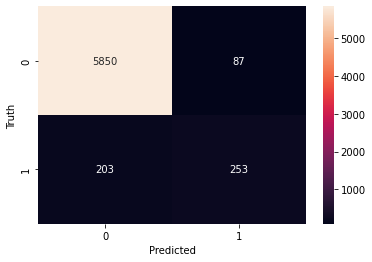

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5937
           1       0.74      0.55      0.64       456

    accuracy                           0.95      6393
   macro avg       0.86      0.77      0.81      6393
weighted avg       0.95      0.95      0.95      6393

